In [1]:
#Importing all the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset

df = pd.read_csv("C:/Users/sarth/Downloads/SeoulBikeData.csv",
                   encoding= 'unicode_escape',parse_dates=[0])
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,2017-01-12,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,2017-01-12,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,2017-01-12,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,2017-01-12,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,2017-01-12,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [4]:
#Getting the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [5]:
#df['Date'] = pd.to_datetime(df['Date'], format='%d%b%Y:%H:%M:%S.%f')
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, format='mixed')

### Changing the datatype of date column to datetime and extracting the day and week weekend column

In [6]:
import datetime as dt

In [7]:
df["Date"].dt.year
df["Date"].dt.month
df["Date"].dt.day

0       12
1       12
2       12
3       12
4       12
        ..
8755    30
8756    30
8757    30
8758    30
8759    30
Name: Date, Length: 8760, dtype: int64

In [8]:
# Creating new columns year, month and day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [9]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday


In [10]:
# defining a function called as weekend
def weekend(x):
    if x == 'Saturday':
        return 1
    elif x == 'Sunday':
        return 1
    return 0

In [11]:
df['Weekend'] = df['day'].apply(weekend)

In [11]:
weekend_df = df[df['Weekend'] == 1]
weekend_df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,Weekend
1761,2018-12-02,262,9,-8.4,28,2.2,1947,-23.7,0.49,0.0,0.0,Winter,No Holiday,Yes,2018,12,Sunday,1
2936,2018-02-04,1469,8,15.7,75,1.1,804,11.2,0.11,0.0,0.0,Spring,No Holiday,Yes,2018,2,Sunday,1
7328,2018-02-10,0,8,11.2,69,0.9,1714,5.7,0.49,0.0,0.0,Autumn,No Holiday,No,2018,2,Saturday,1
2054,2018-02-24,454,14,6.9,19,1.9,1843,-15.1,2.36,0.0,0.0,Winter,No Holiday,Yes,2018,2,Saturday,1
4094,2018-05-20,1680,14,20.3,30,1.8,2000,2.1,1.01,0.0,0.0,Spring,No Holiday,Yes,2018,5,Sunday,1
5236,2018-07-07,331,4,20.0,63,1.8,2000,12.7,0.00,0.0,0.0,Summer,No Holiday,Yes,2018,7,Saturday,1
5107,2018-01-07,18,19,21.9,96,1.2,509,21.2,0.01,5.5,0.0,Summer,No Holiday,Yes,2018,1,Sunday,1
7541,2018-11-10,197,5,6.6,73,1.1,2000,2.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Saturday,1
896,2018-07-01,122,8,-5.3,53,1.1,1411,-13.4,0.00,0.0,0.0,Winter,No Holiday,Yes,2018,7,Sunday,1
6947,2018-09-16,1014,11,23.4,61,2.1,1964,15.4,0.91,0.0,0.0,Autumn,No Holiday,Yes,2018,9,Sunday,1


In [12]:
df['Weekend'].value_counts()

0    6216
1    2544
Name: Weekend, dtype: int64

In [13]:
## converting month number to month name
#df['Month_name'] = dt.datetime.strptime('month', "%B")

In [15]:
#  This function takes a month number as a string and returns the name of the month as a string.
#It uses the calendar module to retrieve the month name from the month number.
# If the month number is not valid, it returns an error message.


import calendar

def convert_month_number_to_name(month_number):
    try:
        month_name = calendar.month_name[int(month_number)]
        return month_name
    except (ValueError, IndexError):
        return "Invalid Month Number"

In [14]:
#df['Month'] = df['month'].apply(convert_month_number_to_name)

In [16]:
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,Weekend
3881,2018-11-05,1863,17,18.9,45,2.6,1084,6.6,0.80,0.0,0.0,Spring,No Holiday,Yes,2018,11,Monday,0
2480,2018-03-14,1371,8,14.2,67,0.9,1812,8.1,0.06,0.0,0.0,Spring,No Holiday,Yes,2018,3,Wednesday,0
6962,2018-09-17,227,2,20.3,81,1.9,1234,16.9,0.00,0.1,0.0,Autumn,No Holiday,Yes,2018,9,Monday,0
8142,2018-05-11,448,6,7.2,83,0.8,636,4.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,5,Friday,0
5966,2018-06-08,571,14,34.0,59,3.2,1180,24.8,1.98,0.0,0.0,Summer,No Holiday,Yes,2018,6,Friday,0
405,2017-12-17,168,21,-6.5,45,0.7,2000,-16.4,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Sunday,1
8613,2018-11-24,392,21,2.6,85,1.1,674,0.3,0.00,0.0,3.2,Autumn,No Holiday,Yes,2018,11,Saturday,1
2390,2018-10-03,906,14,9.2,38,2.6,1377,-4.4,2.53,0.0,0.0,Spring,No Holiday,Yes,2018,10,Wednesday,0
6292,2018-08-20,193,4,26.2,65,1.1,1542,19.0,0.00,0.0,0.0,Summer,No Holiday,Yes,2018,8,Monday,0
1620,2018-06-02,172,12,-8.2,31,2.7,1858,-22.3,2.09,0.0,0.0,Winter,No Holiday,Yes,2018,6,Saturday,1


In [16]:
## Now we can drop columns which are not important like date and month
df.drop(['Date', 'day', 'year'], axis = 1, inplace = True)

In [17]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


### Checking for null values

In [18]:
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
Weekend                      0
dtype: int64

In [19]:
df['month'] = df['month'].astype('int64')

### since hour, month and weekend columns are categorical columns, lets change the dtype of it.

In [20]:
columns = ['Hour', 'month', 'Weekend']
for i in columns:
    df[i] = df[i].astype('category') 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [23]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


### Checking for duplicated data 

In [22]:
df.duplicated().sum()

0

### Since we can see th column dew point temperature and temperature is almost correlated, hence we can drop one out of the two

In [23]:
df.drop(['Dew point temperature(°C)'], axis = 1, inplace = True)

In [26]:
df = df.rename(columns = {'Temperature(°C)': 'Temp',
                     'Humidity(%)': 'Humidity',
                     'Wind speed (m/s)': 'wind_speed',
                     'Visibility (10m)': 'Visibility',
                     'Solar Radiation (MJ/m2)': 'Solar',
                     'Rainfall(mm)': 'Rainfall',
                     'Snowfall (cm)': 'Snowfall'})

### Heatmap for correlation

In [24]:
heatmap = df.select_dtypes(exclude=[object])

In [25]:
corr = heatmap.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,0.149738,-0.167629,-0.121695
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.072301,0.008500,1.000000


In [26]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


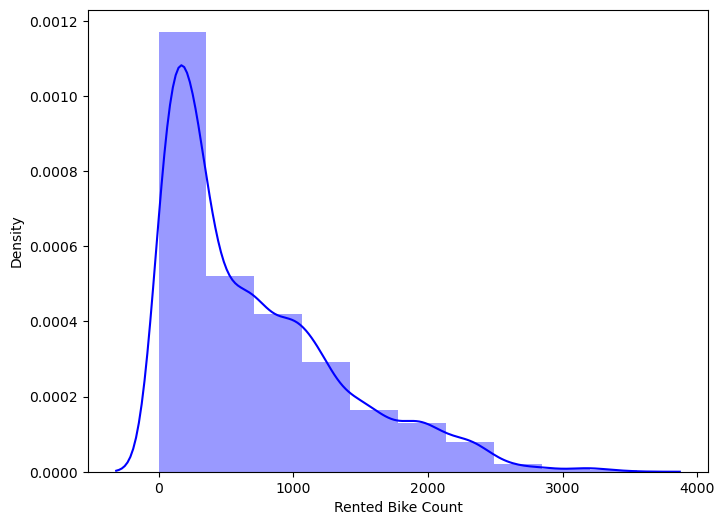

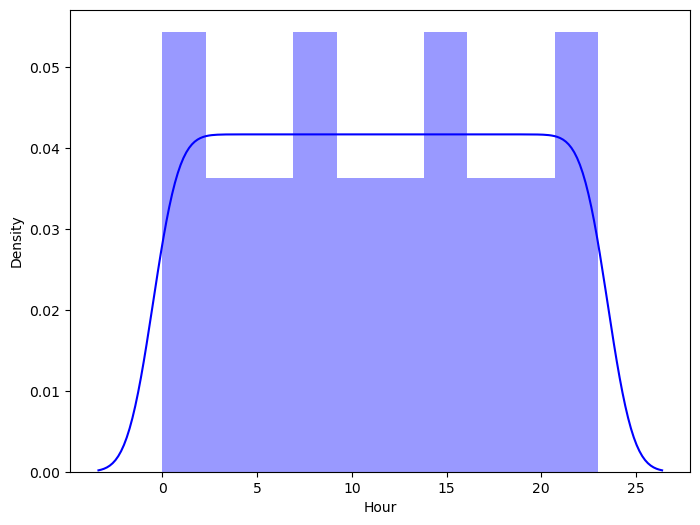

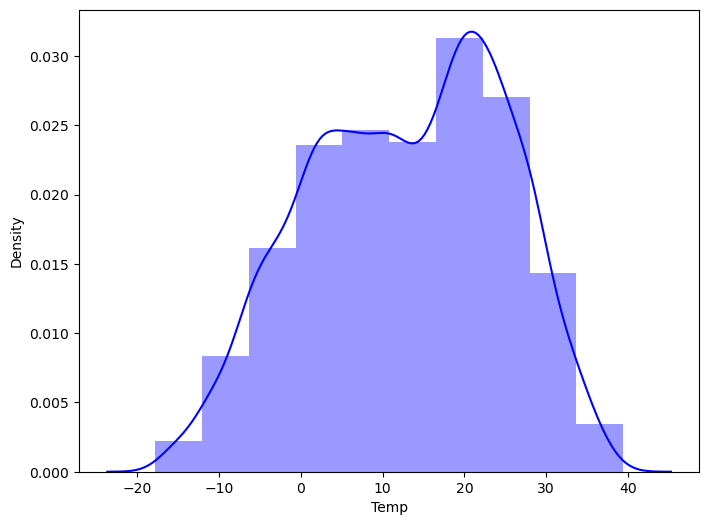

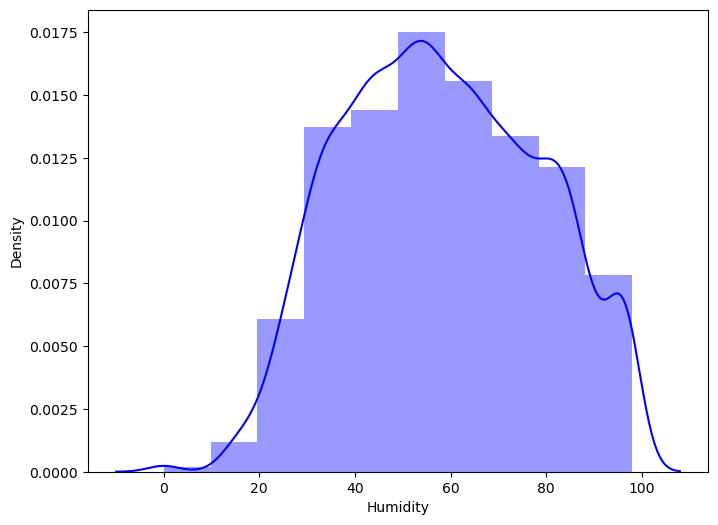

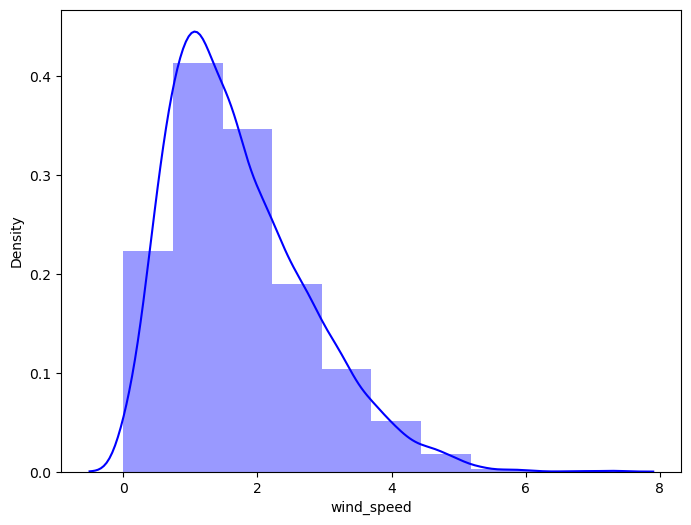

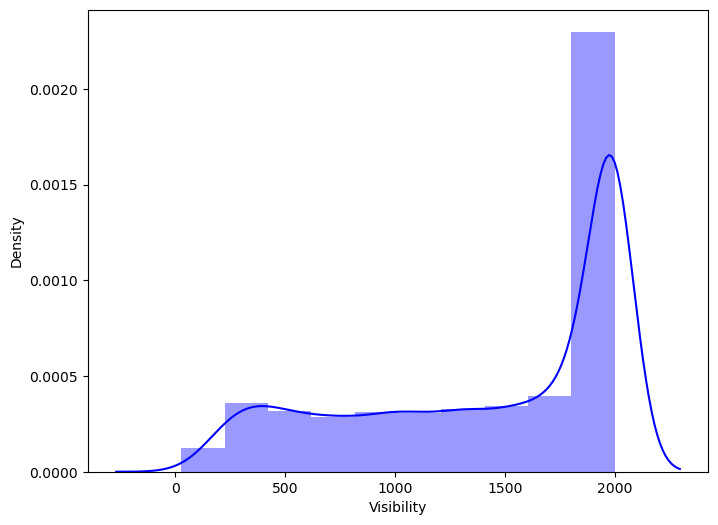

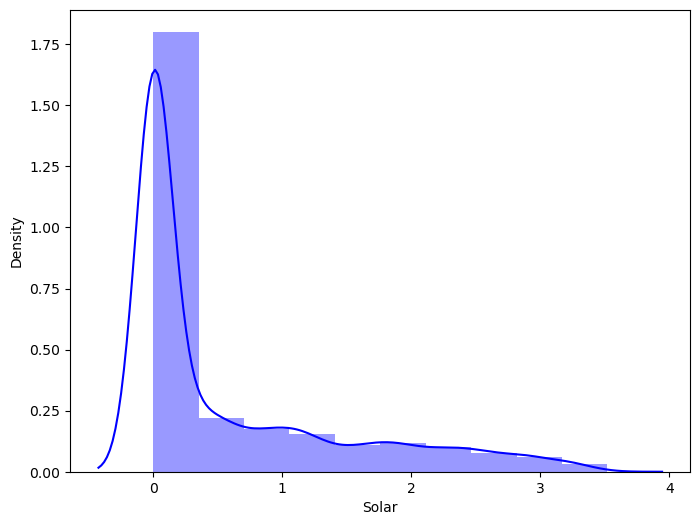

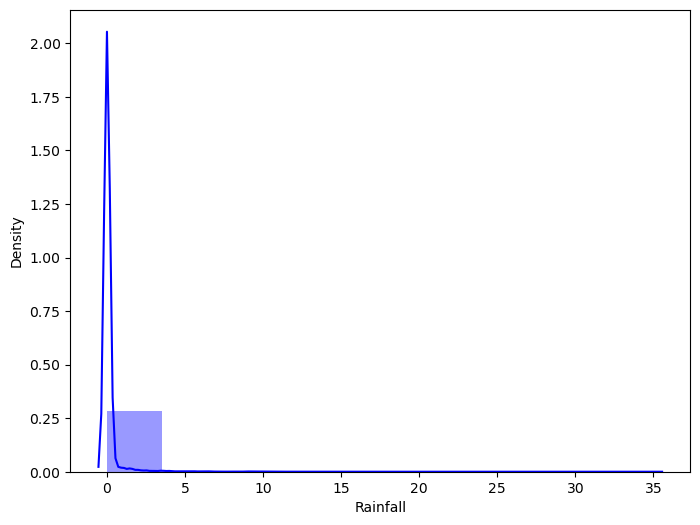

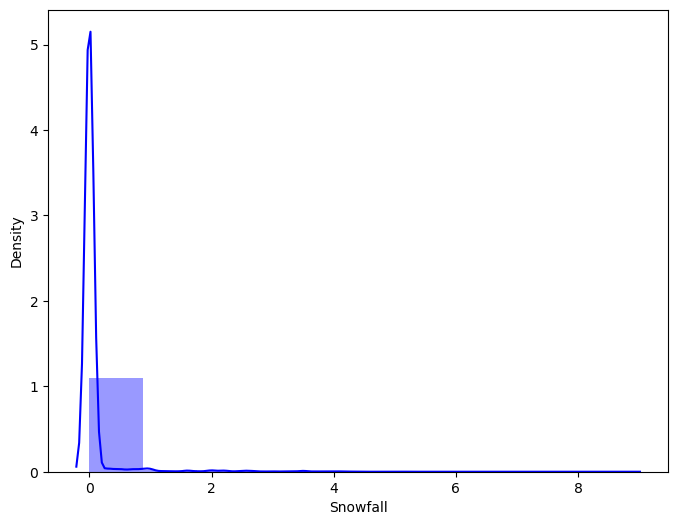

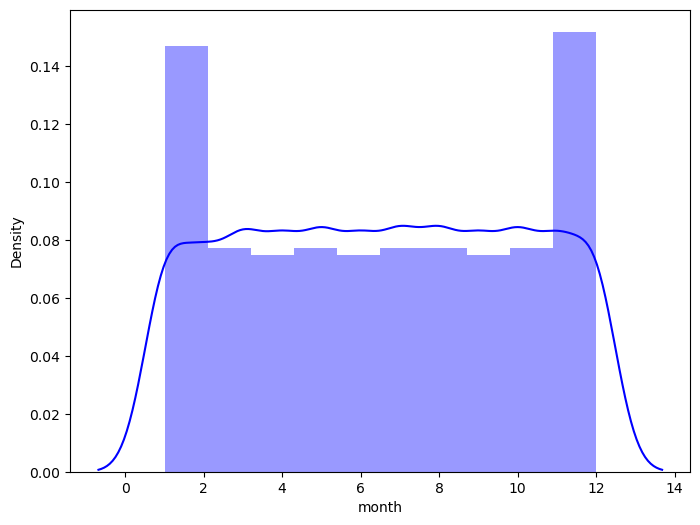

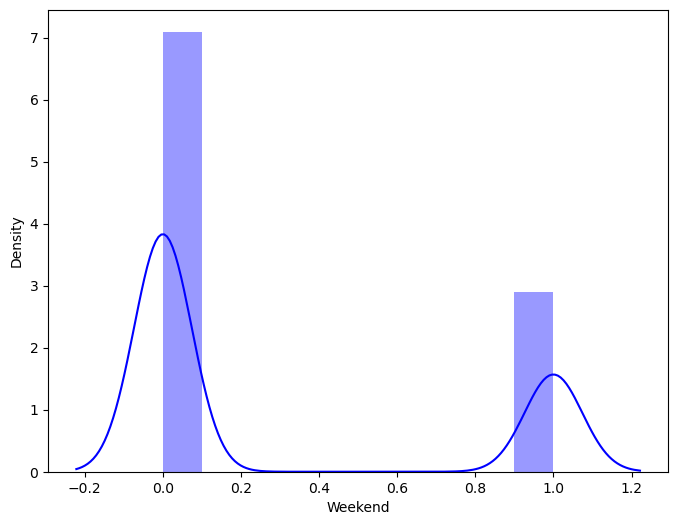

In [30]:
# generates a histogram for each column of a data frame that is not of type object. 
#The seaborn distplot function is used to generate the histogram, and the kde parameter is set to True to show the kernel density estimate.
for column in heatmap.columns:
    plt.figure(figsize=(8, 6))
    sns.distplot(heatmap[column], kde=True, bins=10, color='blue')

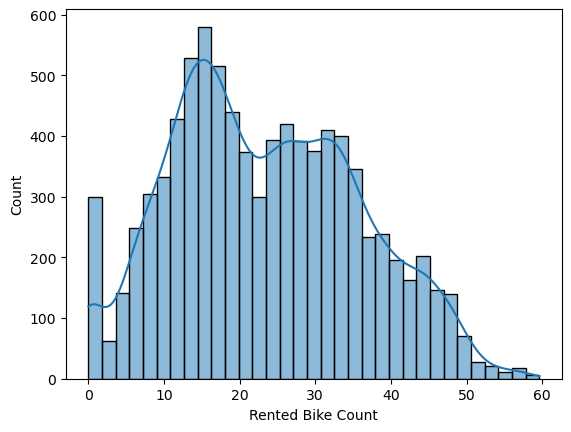

In [31]:
sns.histplot(x = np.sqrt(df['Rented Bike Count']), kde = True)
plt.show()

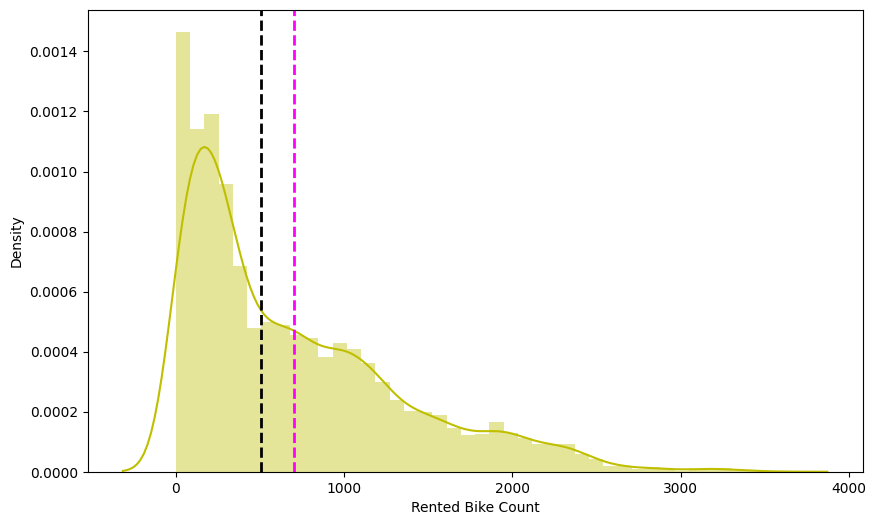

In [27]:
#Applying square root to Rented Bike Count to improve skewness
# generates a histogram for the Rented Bike Count column and shows the density of the data. The seaborn distplot function is used to generate the histogram, and the kde parameter is set to True to show the kernel density estimate. 
#The code also adds vertical lines to show the mean and median of the data.
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot((df['Rented Bike Count']), color="y")
ax.axvline((df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline((df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

<Axes: xlabel='Rented Bike Count'>

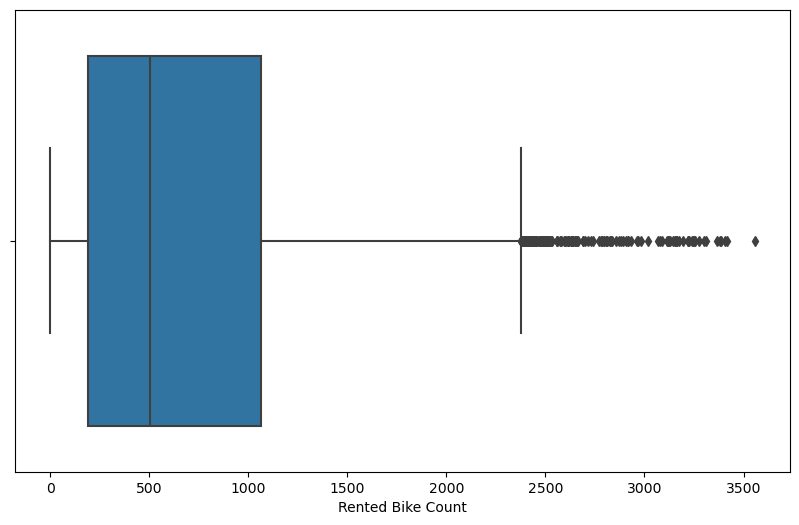

In [33]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df['Rented Bike Count'])

In [28]:
df['Rented Bike Count'].skew()

1.1534281773679014

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

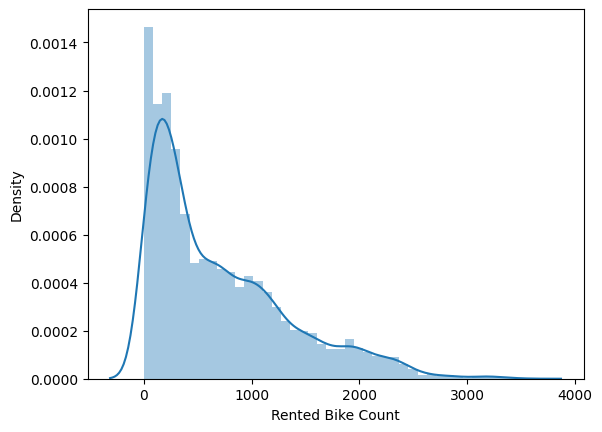

In [29]:
sns.distplot(df['Rented Bike Count'])

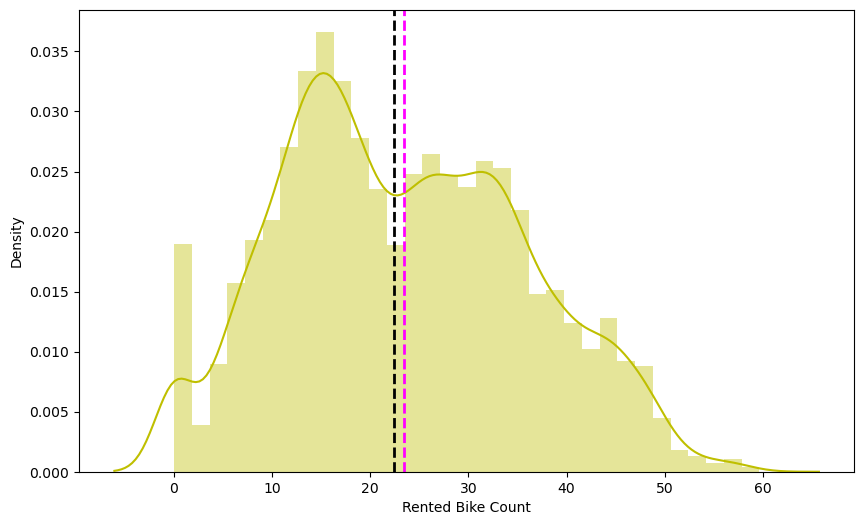

In [36]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

<Axes: xlabel='Rented Bike Count'>

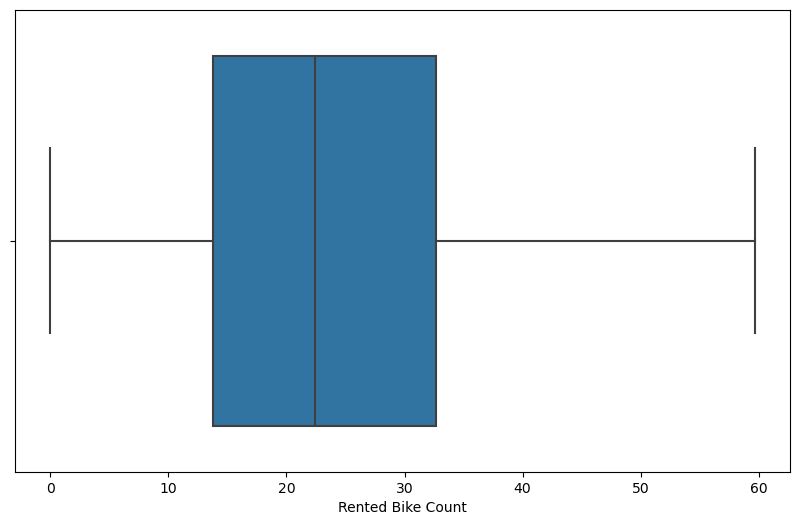

In [37]:
plt.figure(figsize = (10,6))
sns.boxplot(x = np.sqrt(df['Rented Bike Count']))

In [31]:
df['rented_bike_count'] = round(np.sqrt(df['Rented Bike Count'])).astype(int)

In [32]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Weekend,rented_bike_count
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,16
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,14
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,13
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,10
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,9


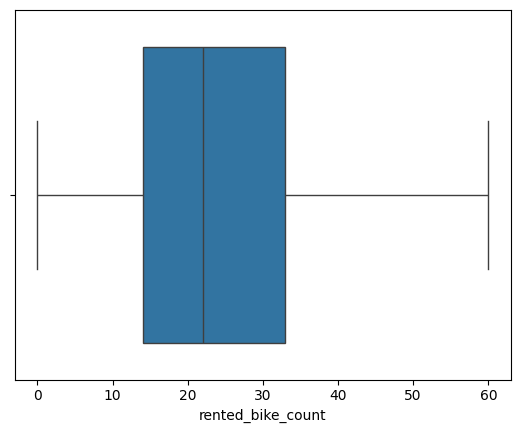

In [33]:
sns.boxplot(x = df['rented_bike_count'])
plt.show()

### Another way of Removing the outliers

In [34]:
#Calculating the percentile values
per75 = df['Rented Bike Count'].quantile(0.75)
per25 = df['Rented Bike Count'].quantile(0.25)

In [35]:
per25

191.0

In [36]:
#Calculatin the interequartile range
IQR = per75 - per25
IQR

874.25

In [37]:
#Calculating the upper limit and lower limit
upper_limit = per75 + 1.5 * IQR
lower_limit = per25 - 1.5 * IQR

In [38]:
upper_limit

2376.625

### Lets remove the outliers which are there in the rented bike count by taking only the data which are there in the upper column

In [39]:
df.shape

(8760, 15)

In [47]:
#df = df[df['Rented Bike Count'] < upper_limit]

In [40]:
df.shape

(8760, 15)

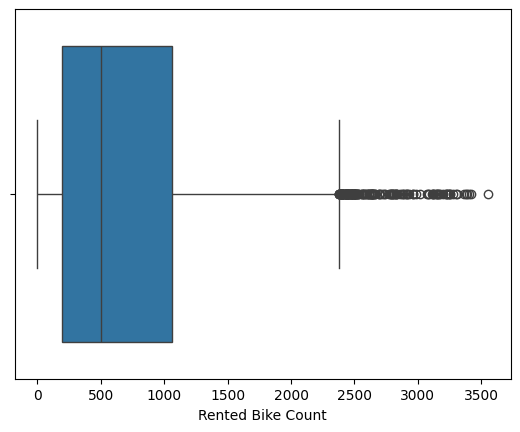

In [41]:
sns.boxplot(x = df['Rented Bike Count'])
plt.show()

In [42]:
df = df.drop('Rented Bike Count', axis = 1)

### one hot encoding

In [43]:
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], prefix='Category')
df.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,Weekend,rented_bike_count,Category_Autumn,Category_Spring,Category_Summer,Category_Winter,Category_Holiday,Category_No Holiday,Category_No,Category_Yes
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,16,0,0,0,1,0,1,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,14,0,0,0,1,0,1,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0,13,0,0,0,1,0,1,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0,10,0,0,0,1,0,1,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0,9,0,0,0,1,0,1,0,1


### Model Preparation

In [44]:
x = df.drop(['rented_bike_count'], axis = 1).values
y = df['rented_bike_count'].values

In [45]:
x

array([[ 0. , -5.2, 37. , ...,  1. ,  0. ,  1. ],
       [ 1. , -5.5, 38. , ...,  1. ,  0. ,  1. ],
       [ 2. , -6. , 39. , ...,  1. ,  0. ,  1. ],
       ...,
       [21. ,  2.6, 39. , ...,  1. ,  0. ,  1. ],
       [22. ,  2.1, 41. , ...,  1. ,  0. ,  1. ],
       [23. ,  1.9, 43. , ...,  1. ,  0. ,  1. ]])

In [46]:
y

array([16, 14, 13, ..., 26, 27, 24])

### Splitting the data

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [48]:
x_train.shape

(6132, 18)

In [49]:
x_test.shape

(2628, 18)

### Standard scalar

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Prediction

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [53]:
lr.fit(x_train, y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(x_test)
y_pred

array([17.89157  , 24.79782  , 18.7900075, ..., 16.9150075, 13.0243825,
       22.532195 ])

In [55]:
print("Trainig Score: ",(lr.score(x_train, y_train))*100)
print("Testing Score: ",(lr.score(x_test, y_test))*100)

Trainig Score:  65.39556979946995
Testing Score:  65.02927413957005


In [56]:
print(lr.coef_)

[ 3.35576441e+00  5.93412600e+00 -3.32176476e+00  9.71801813e-02
  1.34647689e-01 -8.09880736e-01 -1.73236794e+00  5.47936309e-02
  3.45036197e-01 -3.39274542e-01  4.05663703e+13  4.06449319e+13
  4.05576031e+13  4.02820081e+13 -2.30966955e+12 -2.30966955e+12
 -9.26218044e+12 -9.26218044e+12]


### Decision tree algorithm 

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [58]:
dt_y_pred = dt.predict(x_test)
dt_y_pred

array([19., 23., 19., ..., 11., 16., 23.])

In [59]:
print("Trainig Score: ",(dt.score(x_train, y_train))*100)
print("Testing Score: ",(dt.score(x_test, y_test))*100)

Trainig Score:  100.0
Testing Score:  83.58798336271262


### Random forest regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [61]:
rf_y_pred = rf.predict(x_test)
rf_y_pred

array([17.33, 23.04, 20.2 , ...,  8.43, 15.46, 19.6 ])

In [62]:
print("Trainig Score: ",(rf.score(x_train, y_train))*100)
print("Testing Score: ",(rf.score(x_test, y_test))*100)

Trainig Score:  98.821273348682
Testing Score:  91.6390899588504


### Going for k fold validation

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
print("Training score for decision tree after cross validation: ",(cross_val_score(dt, x_train, y_train).mean())*100)
print("Testing score for decision tree after cross validation: ",(cross_val_score(dt, x_test, y_test).mean())*100)

Training score for decision tree after cross validation:  82.6498903875142
Testing score for decision tree after cross validation:  80.37247604212219


In [65]:
print("Training score for LinearRegression after cross validation: ",(cross_val_score(lr, x_train, y_train).mean())*100)
print("Testing score for LinearRegression after cross validation: ",(cross_val_score(lr, x_test, y_test).mean())*100)

Training score for LinearRegression after cross validation:  65.21289183858048
Testing score for LinearRegression after cross validation:  64.64586139236994


In [66]:
print("Training score for RandomForest after cross validation: ",(cross_val_score(rf, x_train, y_train).mean())*100)
print("Testing score for RandomForest after cross validation: ",(cross_val_score(rf, x_test, y_test).mean())*100)

Training score for RandomForest after cross validation:  90.97611128128061
Testing score for RandomForest after cross validation:  89.03207256130958
